# IDS 705 Assignment 1 - Data Exploration

## Nathan Scheperle
Netid:  nes31

I play too much FIFA. I hate it, I love it, I'm bad at it, I can't stop it. This is mostly a dumb dataset that I thought would be fun to look at since it's a hobby of mine. I know the background of the data well enough that I could dive right in and find some things interesting to me. 

From a more serious perspective, I'm interested in this data because I believe it (and games like it) will become central to the debate around microtransactions in gaming in the next few years. EA makes the majority of their money from FIFA not by selling copies of the game, but by selling packs of player cards in the game mode called FIFA Ultimate Team - essentially a virtual trading card game. Some countries have begun passing legislation regarding microtransactions like this, for example making it compulsory to publish pack odds. However, this is still a game played by children who probably aren't yet capable of making an informed decision based on these odds and shouldn't be exposed to what is tantamount to gambling. Further, EA uses aggressive marketing techniques for these packs that have enticed even adults into spending thousands of dollars each year.

Fascinatingly and frustratingly, EA seems to develop a product intended to keep it's audience engaged, regardless of the amount of fun they're having. As part of this strategy, a considerable amount of information is kept hidden from the user, such as the meaning of different stats and how certain game mechanics are intended to behave. Beyond my interest in the microtransaction aspect of the game, I'm also interested these hidden aspects of the game and how users interact with them.

I downloaded the complete dataset of FIFA 19 players from Kaggle, found here with the following description:

https://www.kaggle.com/karangadiya/fifa19

"data.csv includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause."

For now, I'm just going to take a cursory look into some of the cleaner variables such as nationality and overall rating.

First, import the base dataset and take a look at it.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read file
fifa = pd.read_csv("./fifa.csv", encoding = "utf-8")

fifa.head()

,Row,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Unfortunately, this dataset is missing some key pieces of information that would be useful. In particular, the league for each player is missing. I found a dataset on FiveThirtyEight's site of global football club rankings. I used this to try to link each club in the FIFA database to a league. Unfortunately (again), the club names in this file don't match exactly to the club names in the FIFA database for around 400 clubs. I tried to manually clean this up a bit, but for now I decided to skip analyzing the leagues.

FiveThirtyEight's dataset can be found here:

https://github.com/fivethirtyeight/data/tree/master/soccer-spi

"spi_global_rankings.csv contains current SPI ratings and rankings for men's club teams."

In [17]:
# Read file
teams = pd.read_csv("./spi_global_rankings.csv", encoding = "utf-8")
teams[['name','league']].head()

# Merge together two datasets, manage column names
fifa = pd.merge(fifa, teams[['name','league']], left_on = 'Club', right_on = 'name', how = 'left')
fifa = fifa.drop(columns=['name'])


Here's the number of players in the database by league. This isn't very accurate for the reasons noted above but I wanted to get a sense for what I had anyway.

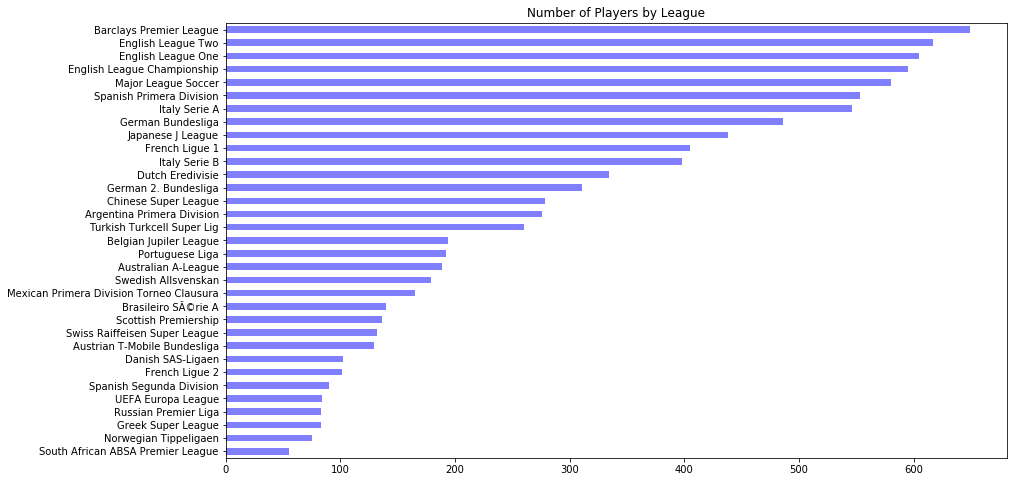

In [18]:
# calculate counts of league values then plot
fifa['league'].value_counts().plot(kind='barh', figsize=(14,8), color='b', alpha=0.5)
plt.title("Number of Players by League")
plt.gca().invert_yaxis()
plt.show()

Luckily the nationality of the players is usuable. Here are the top 50 nationalities in the dataset.

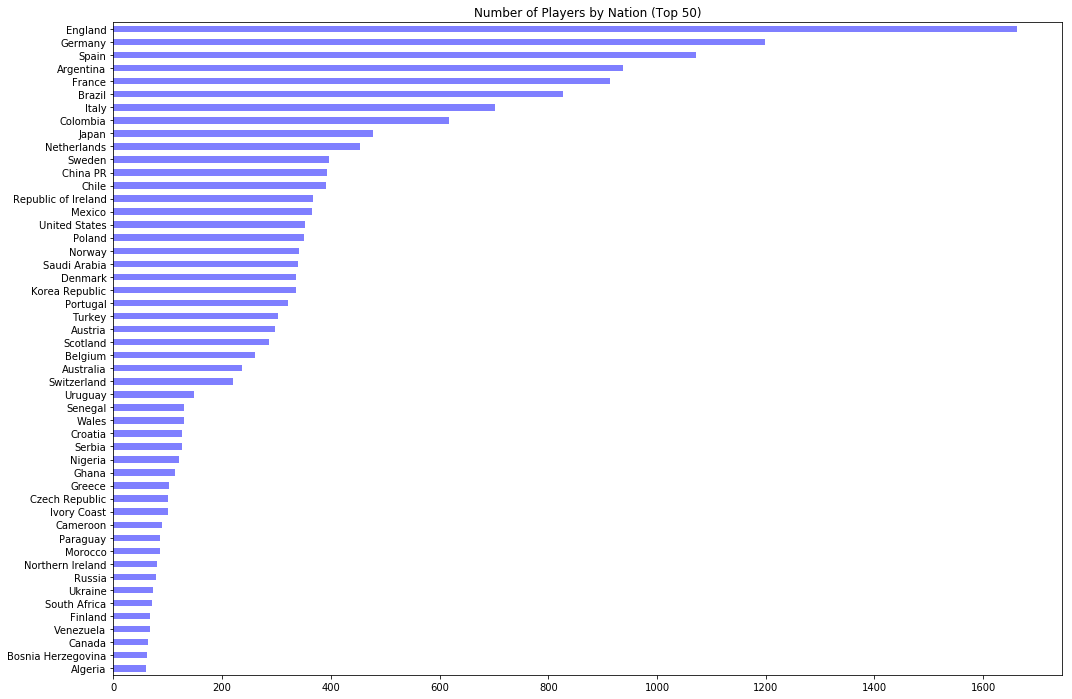

In [19]:
# calculate counts of nationality values then plot
fifa['Nationality'].value_counts()[:50].plot(kind='barh', figsize=(17,12), color='b', alpha=0.5)
plt.title("Number of Players by Nation (Top 50)")
plt.gca().invert_yaxis()
plt.show()

Next, I wanted to see the distribution of player ratings in the database. There's also a field for "potential" which is supposed to be the highest rating a player can achieve in his career.

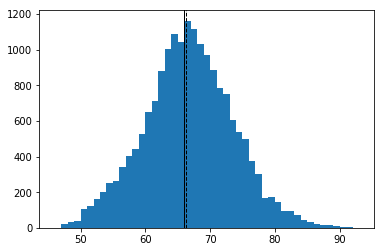

In [20]:
# create histogram and add mean and median lines
plt.hist(fifa['Overall'], bins=range(min(fifa['Overall']),max(fifa['Overall'])))
plt.axvline(fifa['Overall'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fifa['Overall'].median(), color='k', linestyle='solid', linewidth=1)
plt.show()

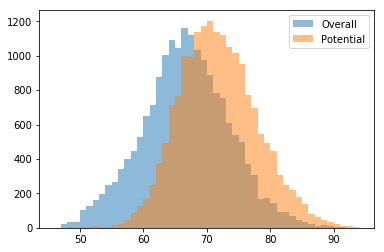

In [21]:
# create overlaying histograms
plt.hist(fifa['Overall'], bins=range(min(fifa['Overall']),max(fifa['Overall'])), alpha=.5, label="Overall")
plt.hist(fifa['Potential'], bins=range(min(fifa['Potential']),max(fifa['Potential'])), alpha=.5, label="Potential")
plt.legend(loc='upper right')
plt.show()

The distribution looks about how we'd expect. The overall ratings are very slightly skewed right. 

What are the average ratings by nationality, though?

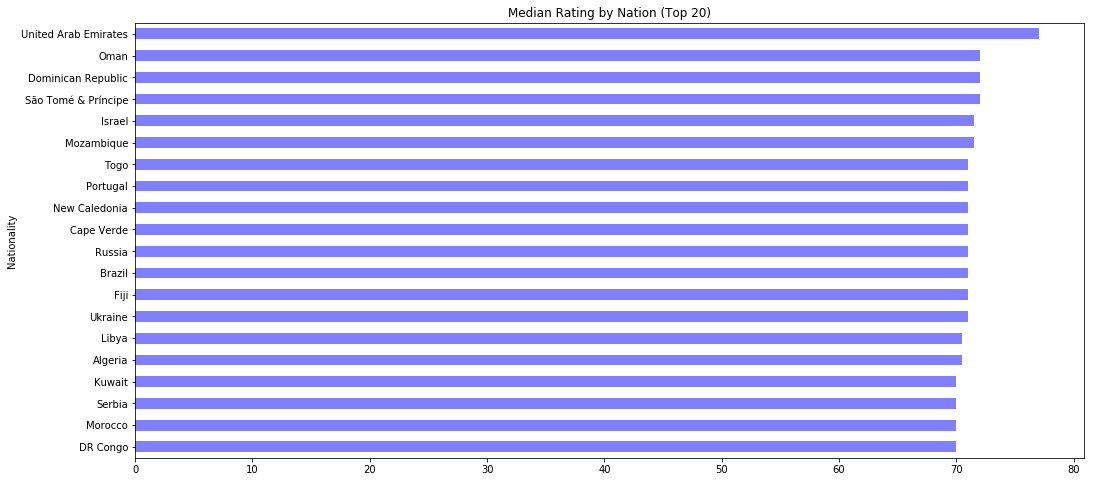

In [22]:
# group by nationality, calculate median overall ratings, sort, then plot
fifa.groupby(['Nationality']).median()['Overall'].sort_values(ascending=False)[:20].plot(kind='barh', figsize=(17,8), color='b', alpha=0.5)
plt.title("Median Rating by Nation (Top 20)")
plt.gca().invert_yaxis()
plt.show()

Watch out, UAE's gunning for 2022. We should probably exclude countries without many players. Let's limit to nations with more than 50 players.

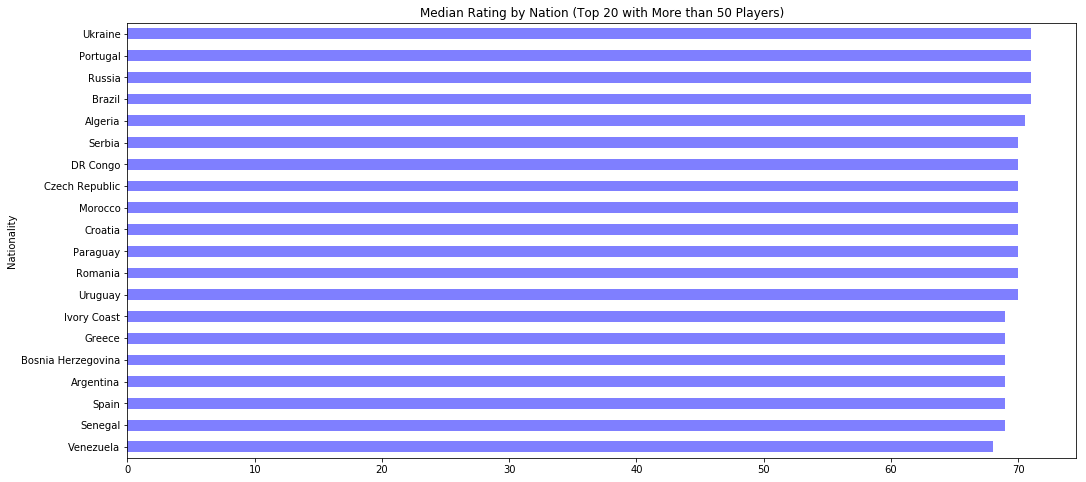

In [23]:
# create series s to use in filter before grouping and calculating
s = (fifa['Nationality'].value_counts() > 50)
fifa.loc[fifa['Nationality'].isin(s.loc[s].index)].groupby(['Nationality']).median()['Overall'].sort_values(ascending=False)[:20].plot(kind='barh', figsize=(17,8), color='b', alpha=0.5)
plt.title("Median Rating by Nation (Top 20 with More than 50 Players)")
plt.gca().invert_yaxis()
plt.show()

This list makes a lot more sense.

How about the average ratings by position? First, we have to clean these up a bit.

Within the game, positions are grouped together for some functions. Since there's a relatively small number of them, I manually created files to map the raw positions in the provided database to these groupings.

In [24]:
# read in files
pos = pd.read_csv("./positions.csv", encoding = "utf-8")
pos_groups = pd.read_csv("./position_groups.csv", encoding = "utf-8")

# merge together position tales
pos = pd.merge(pos, pos_groups, left_on = 'Position', right_on = 'Position')

# merge together base dataset and manage column names
fifa = fifa.rename(index=str, columns={'Position':'Raw Position'})
fifa = pd.merge(fifa, pos, left_on = 'Raw Position', right_on = 'Raw', how = 'left')

In [25]:
pos

,Raw,Position,Subgroup,Group
0,LCM,CM,CDM\CM\CAM,Midfielders
1,CM,CM,CDM\CM\CAM,Midfielders
2,RCM,CM,CDM\CM\CAM,Midfielders
3,RAM,CAM,CDM\CM\CAM,Midfielders
4,CAM,CAM,CDM\CM\CAM,Midfielders
5,LAM,CAM,CDM\CM\CAM,Midfielders
6,RDM,CDM,CDM\CM\CAM,Midfielders
7,CDM,CDM,CDM\CM\CAM,Midfielders
8,LDM,CDM,CDM\CM\CAM,Midfielders
9,RS,ST,CF\ST,Attackers


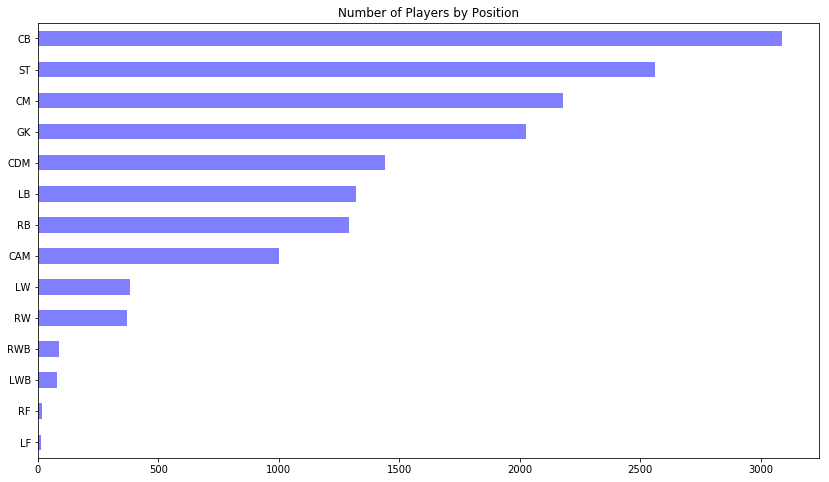

In [26]:
fifa['Position'].value_counts().plot(kind='barh', figsize=(14,8), color='b', alpha=0.5)
plt.title("Number of Players by Position")
plt.gca().invert_yaxis()
plt.show()

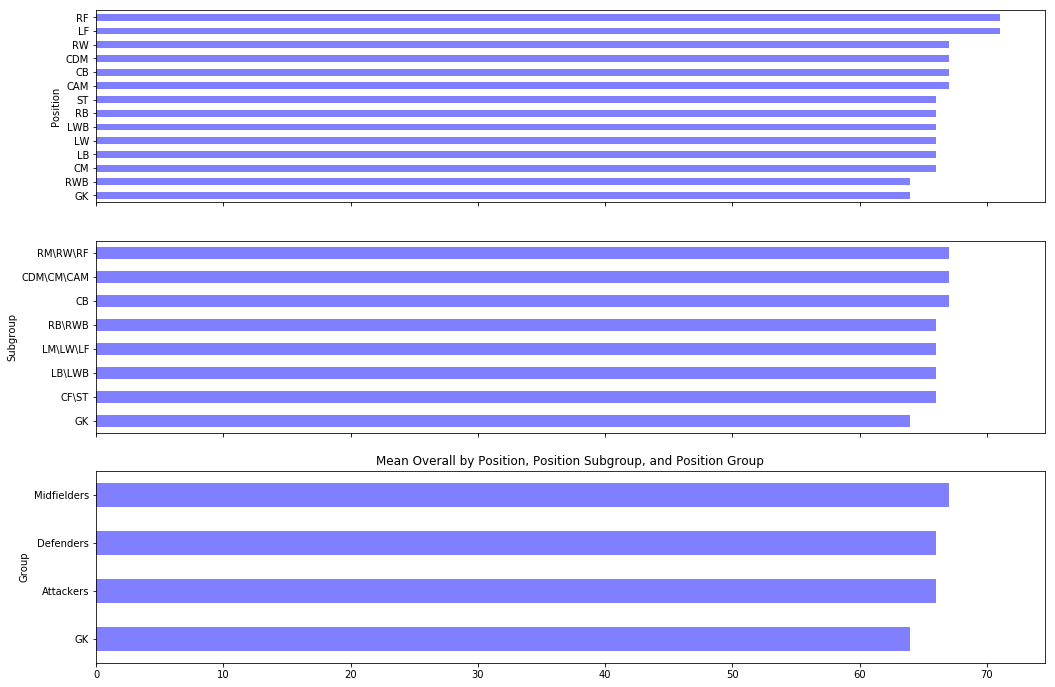

In [27]:
# create axes for subplots
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2, sharex = ax1)
ax3 = fig.add_subplot(3,1,3, sharex = ax1)

# find the mean overall by position, sort the values, add to plots
fifa.groupby(['Position']).median()['Overall'].sort_values(ascending=False).plot(ax = ax1, kind='barh', figsize=(17,12), color='b', alpha=0.5)
plt.title("Mean Overall by Position, Position Subgroup, and Position Group")
ax1.invert_yaxis()

fifa.groupby(['Subgroup']).median()['Overall'].sort_values(ascending=False).plot(ax = ax2, kind='barh', figsize=(17,12), color='b', alpha=0.5)
ax2.invert_yaxis()

fifa.groupby(['Group']).median()['Overall'].sort_values(ascending=False).plot(ax = ax3, kind='barh', figsize=(17,12), color='b', alpha=0.5)
ax3.invert_yaxis()
plt.show()

We would expect a player's rating to be correlated with his salary. Let's see if that's the case.

In [28]:
# Clean up the wages data
fifa['Wage'] = fifa['Wage'].replace('[€]', '', regex=True).replace('[K]', '', regex=True).astype(float)

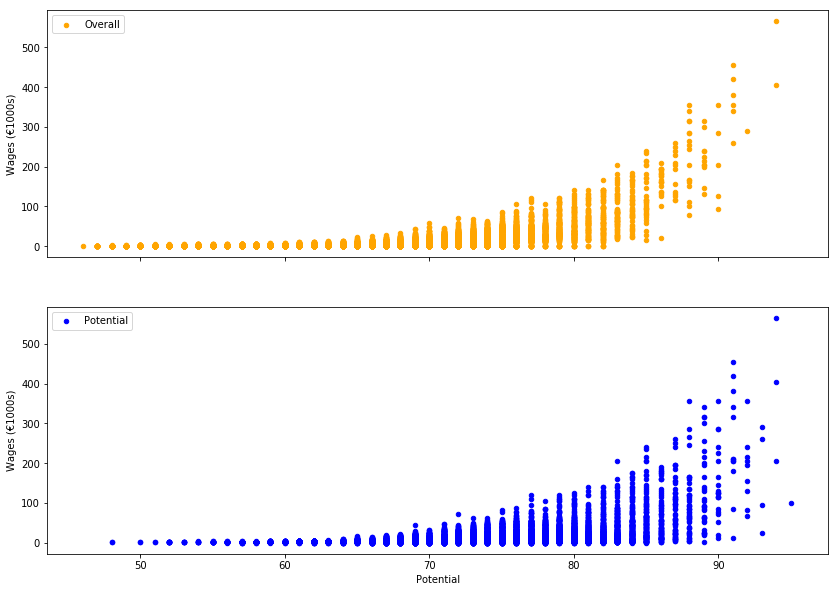

In [29]:
# delete old axes to not interfere with new graph
del ax1
del ax2
# create scatter plots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, sharex = ax1)
fifa.plot.scatter(x='Overall', y='Wage', figsize=(14,10), ax = ax1, color = 'orange', label='Overall')
fifa.plot.scatter(x='Potential', y='Wage', figsize=(14,10), ax = ax2, color = 'blue', label='Potential')

# set labels and legend
ax1.set_ylabel('Wages (€1000s)')
ax2.set_ylabel('Wages (€1000s)')
plt.legend(loc='upper left')
plt.show()

There's a pretty clear non-linear trend between rating and wages, seemingly exponential. But since rating is the thing being made up and wages are an actual measurable variable, maybe it would make more sense for wages to be the independent variable. Here's rating plotted against log wages.

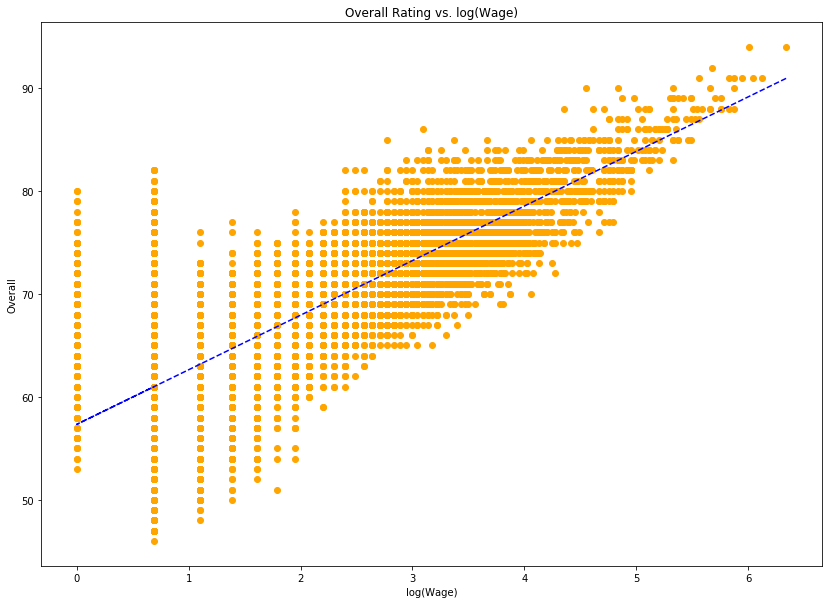

In [30]:
# add 1 to correct wages of 0 before calculating logwage
logwage = np.log(fifa['Wage'] + 1)

# create scatter plot
fig = plt.figure(figsize=(14,10))
plt.scatter(logwage, fifa['Overall'], color = 'orange', label = 'Overall vs. log(Wage)')
plt.xlabel('log(Wage)')
plt.ylabel('Overall')
plt.title('Overall Rating vs. log(Wage)')

# calculate line of best fit
z = np.polyfit(logwage, fifa['Overall'], 1)
p = np.poly1d(z)
plt.plot(logwage,p(logwage),"b--")

plt.show()